## Initial Data Inspection 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
#Importing share-healthy-diet-unafordable
diet_unafordable= pd.read_csv('/Users/pavelpavlov/Desktop/gaussian_peppers/food_diets_eda/raw_data/share-healthy-diet-unaffordable/share-healthy-diet-unaffordable.csv')
diet_unafordable

,Entity,Code,Year,Share of the population who cannot afford a healthy diet
0,Albania,ALB,2017,24.3
1,Albania,ALB,2018,17.5
2,Albania,ALB,2019,15.3
3,Albania,ALB,2020,14.1
4,Albania,ALB,2021,12.6
...,...,...,...,...
944,Zambia,ZMB,2019,79.0
945,Zambia,ZMB,2020,80.5
946,Zambia,ZMB,2021,81.3
947,Zambia,ZMB,2022,81.7


In [42]:
diet_unafordable.describe()

,Year,Share of the population who cannot afford a healthy diet
count,949.000000,949.000000
mean,2019.494204,33.095574
std,1.712210,26.633389
min,2017.000000,0.000000
25%,2018.000000,8.600000
50%,2019.000000,26.700000
75%,2021.000000,55.500000
max,2022.000000,94.800000


In [3]:
diet_unafordable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 4 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Entity                                                    949 non-null    object 
 1   Code                                                      883 non-null    object 
 2   Year                                                      949 non-null    int64  
 3   Share of the population who cannot afford a healthy diet  949 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 29.8+ KB


<Axes: xlabel='Share of the population who cannot afford a healthy diet', ylabel='Count'>

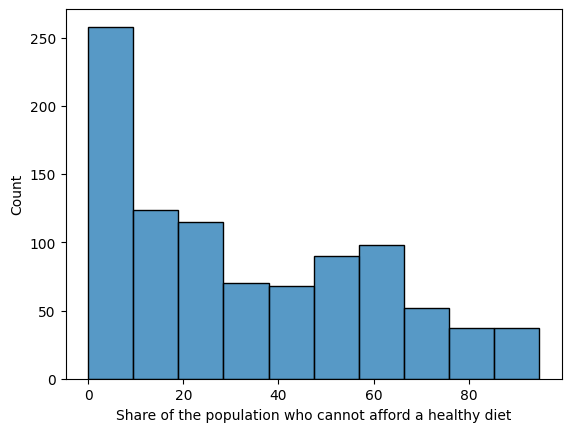

In [54]:
sns.histplot(diet_unafordable['Share of the population who cannot afford a healthy diet'], bins=10, stat="count")


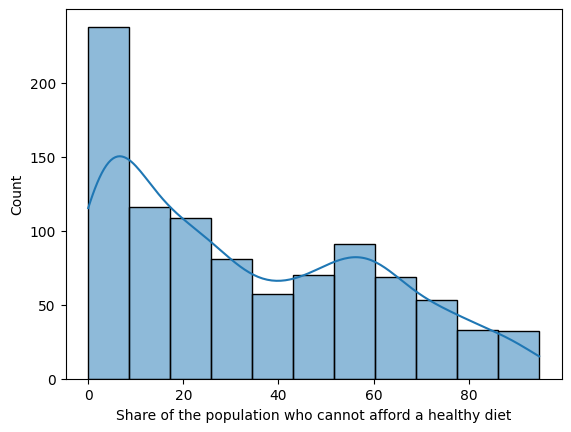

In [ ]:
sns.histplot(diet_unafordable['Share of the population who cannot afford a healthy diet'], kde=True)
plt.show()

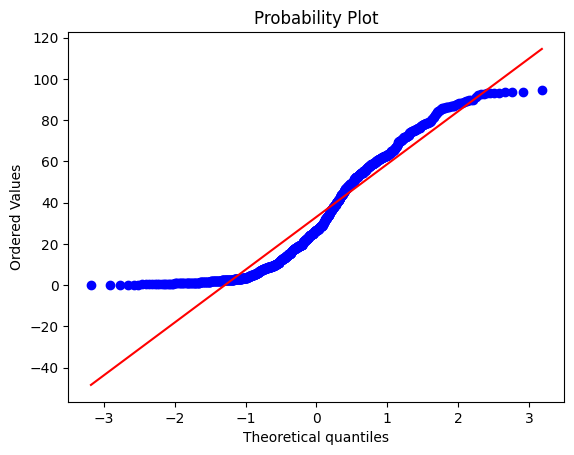

In [70]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(diet_unafordable['Share of the population who cannot afford a healthy diet'], dist="norm", plot=plt)
plt.show()

In [ ]:
#Shapiro-Wilk Test
from scipy.stats import shapiro
stat, p = shapiro(diet_unafordable['Share of the population who cannot afford a healthy diet'])
print('p-value:', p)

p-value: 3.189493255656301e-22


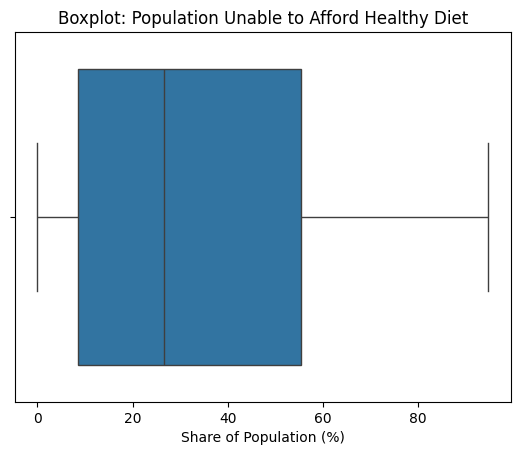

In [60]:
sns.boxplot(x=diet_unafordable['Share of the population who cannot afford a healthy diet'])
plt.xlabel("Share of Population (%)")
plt.title("Boxplot: Population Unable to Afford Healthy Diet")
plt.show()

In [87]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis for the specified column in diet_unafordable
data = diet_unafordable['Share of the population who cannot afford a healthy diet'].dropna()

# Calculate skewness and kurtosis
skewness = skew(data)
kurt = kurtosis(data)  # excess kurtosis by default

print(f"Skewness: {skewness}")
print(f"Excess Kurtosis: {kurt}")


Skewness: 0.49218539154744495
Excess Kurtosis: -0.975097892880151


## share of population diet Data moderately right-skewed

In [40]:
inflation = pd.read_csv('/Users/pavelpavlov/Desktop/gaussian_peppers/food_diets_eda/raw_data/inflation-of-consumer-prices/inflation-of-consumer-prices.csv')
inflation


,Entity,Code,Year,"Inflation, consumer prices (annual %)"
0,Afghanistan,AFG,2005,12.686269
1,Afghanistan,AFG,2006,6.784596
2,Afghanistan,AFG,2007,8.680571
3,Afghanistan,AFG,2008,26.418665
4,Afghanistan,AFG,2009,-6.811161
...,...,...,...,...
9579,Zimbabwe,ZWE,2018,10.618866
9580,Zimbabwe,ZWE,2019,255.305000
9581,Zimbabwe,ZWE,2020,557.201840
9582,Zimbabwe,ZWE,2021,98.546104


diet_unafordable summary: 
949 rows and 4 columns



In [ ]:
filtered_df = inflation[inflation['Year'].isin([2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])]
filtered_df

In [43]:
filtered_df.describe()

,Year,"Inflation, consumer prices (annual %)"
count,1506.000000,1506.000000
mean,2020.420983,7.181473
std,2.277887,22.882436
min,2017.000000,-6.687321
25%,2018.000000,1.676789
50%,2020.000000,3.302233
75%,2022.000000,6.401845
max,2024.000000,557.201840


<Axes: xlabel='Inflation, consumer prices (annual %)', ylabel='Count'>

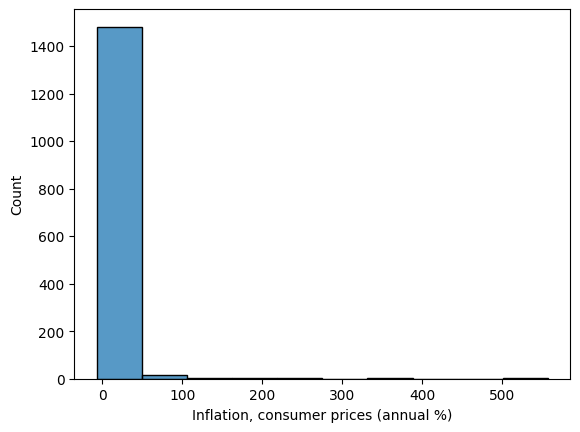

In [ ]:
sns.histplot(filtered_df['Inflation, consumer prices (annual %)'], bins=10, stat="count")


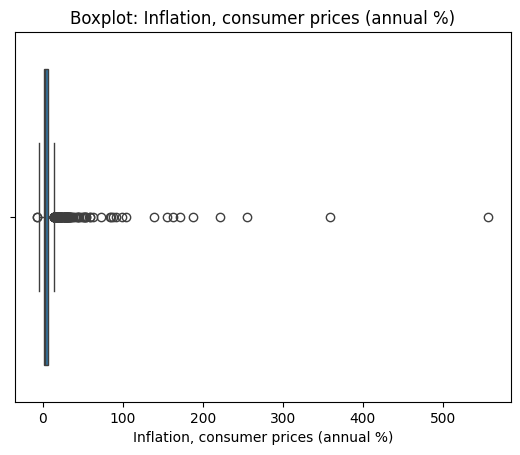

In [61]:
sns.boxplot(x=filtered_df['Inflation, consumer prices (annual %)'])
plt.xlabel("Inflation, consumer prices (annual %)")
plt.title("Boxplot: Inflation, consumer prices (annual %)")
plt.show()

In [73]:
#Shapiro-Wilk Test
from scipy.stats import shapiro
stat, p = shapiro(filtered_df['Inflation, consumer prices (annual %)'])
print('p-value:', p)

p-value: 7.2632318122657e-62


In [88]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis for the specified column in diet_unafordable
data = filtered_df['Inflation, consumer prices (annual %)'].dropna()

# Calculate skewness and kurtosis
skewness = skew(data)
kurt = kurtosis(data)  # excess kurtosis by default

print(f"Skewness: {skewness}")
print(f"Excess Kurtosis: {kurt}")

Skewness: 14.440616662895179
Excess Kurtosis: 279.09574167544105


## Inflation data is extremely right-skewed and has very heavy tails with extreme outliers.

In [ ]:
pwd

In [ ]:
filtered_df.to_csv('/Users/pavelpavlov/Desktop/gaussian_peppers/food_diets_eda/cleaned_data/inflation_of_consumer_prices_cleaned.csv', index=False)

In [ ]:
diet_unafordable.info()

In [ ]:
#Initial Data Inspection
diet_unafordable.dtypes

In [ ]:
diet_unafordable.describe()

In [64]:
wfp=pd.read_csv('/Users/pavelpavlov/Desktop/gaussian_peppers/food_diets_eda/Data/wfp_all_years.csv')
wfp

,country,year,category,sumPrice,meanPrice
0,AFG,2017,cereals and tubers,154.72000,0.512318
1,AFG,2017,non-food,1578.63000,4.111016
2,AGO,2017,cereals and tubers,123.54000,2.573750
3,AGO,2017,milk and dairy,538.60000,44.883333
4,AGO,2017,miscellaneous food,9.00000,4.500000
...,...,...,...,...,...
3834,ZWE,2025,"meat, fish and eggs",0.02400,0.006000
3835,ZWE,2025,miscellaneous food,0.00035,0.000350
3836,ZWE,2025,non-food,0.00719,0.000479
3837,ZWE,2025,oil and fats,0.00240,0.001200


In [65]:
wfp.describe()

,year,sumPrice,meanPrice
count,3839.000000,3839.000000,3839.000000
mean,2021.034905,4542.092367,9.485090
std,2.515886,28172.985215,58.488199
min,2017.000000,0.000350,0.000223
25%,2019.000000,112.275000,0.870747
50%,2021.000000,459.780000,1.608788
75%,2023.000000,1468.010000,3.852046
max,2025.000000,891245.786462,1818.559881


<Axes: xlabel='meanPrice', ylabel='Count'>

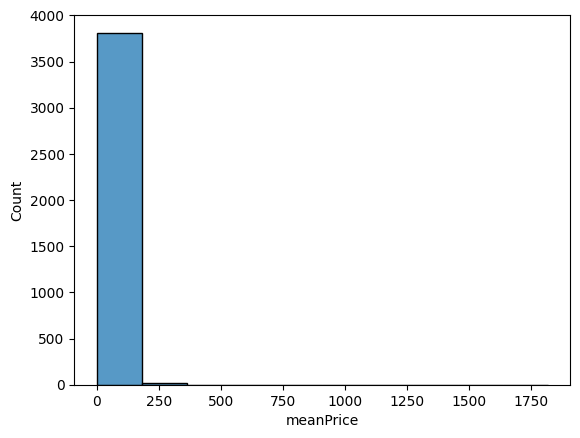

In [66]:
sns.histplot(wfp['meanPrice'], bins=10, stat="count")


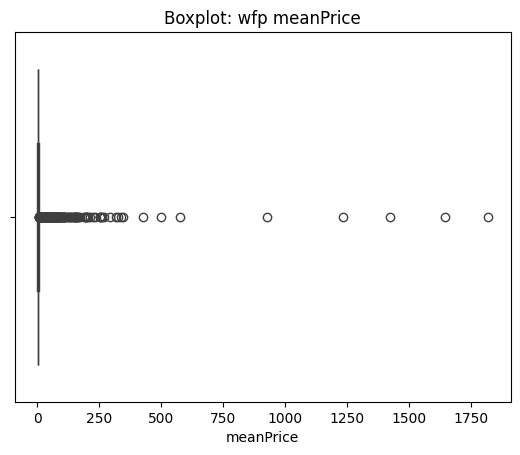

In [67]:
sns.boxplot(x=wfp['meanPrice'])
plt.xlabel("meanPrice")
plt.title("Boxplot: wfp meanPrice")
plt.show()

In [74]:
#Shapiro-Wilk Test
from scipy.stats import shapiro
stat, p = shapiro(wfp['meanPrice'])
print('p-value:', p)

p-value: 2.451574772200566e-86


In [80]:
# Rename columns for merging
filtered_df_renamed = filtered_df.rename(columns={'Entity': 'country', 'Year': 'year'})
diet_unafordable_renamed = diet_unafordable.rename(columns={'Entity': 'country', 'Year': 'year'})

# Merge the two datasets on country and year to align rows
merged_df = pd.merge(
    filtered_df_renamed[['country', 'year', 'Inflation, consumer prices (annual %)']],
    diet_unafordable_renamed[['country', 'year', 'Share of the population who cannot afford a healthy diet']],
    on=['country', 'year'],
    how='inner'
)

# Convert columns to numeric, coercing errors to NaN
merged_df['Inflation, consumer prices (annual %)'] = pd.to_numeric(
    merged_df['Inflation, consumer prices (annual %)'], errors='coerce'
)
merged_df['Share of the population who cannot afford a healthy diet'] = pd.to_numeric(
    merged_df['Share of the population who cannot afford a healthy diet'], errors='coerce'
)

# Drop rows with NaN in either column
merged_df = merged_df.dropna(subset=[
    'Inflation, consumer prices (annual %)',
    'Share of the population who cannot afford a healthy diet'
])

# Extract aligned Series
data1 = merged_df['Inflation, consumer prices (annual %)']
data2 = merged_df['Share of the population who cannot afford a healthy diet']

# Compute Kendall's tau
tau, p_value = kendalltau(data1, data2)

print(f"Kendall's tau correlation: {tau}")
print(f"P-value: {p_value}")

Kendall's tau correlation: 0.18493394270592503
P-value: 5.648477212848684e-17


In [86]:
from sklearn.linear_model import LinearRegression
import numpy as np

# For standard linear regression without transformation:
X = data1.values.reshape(-1, 1)
y = data2.values

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Get regression parameters
slope = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)

print(f'Linear regression equation: y = {slope:.4f} * x + {intercept:.4f}')
print(f'R^2 score: {r2:.4f}')

# If you want to try log transformation, uncomment the lines above and compare results.

Linear regression equation: y = 0.0987 * x + 31.9557
R^2 score: 0.0041


In [85]:
# Filter to strictly positive values before log transformation
mask = (data1 > 0) & (data2 > 0)
X = np.log1p(data1[mask].values).reshape(-1, 1)
y = np.log1p(data2[mask].values)

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Get regression parameters
slope = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)

print(f'Linear regression equation: y = {slope:.4f} * x + {intercept:.4f}')
print(f'R^2 score: {r2:.4f}')

Linear regression equation: y = 0.3119 * x + 2.5518
R^2 score: 0.0497


In [92]:
import statsmodels.api as sm

# For standard regression (no log transformation):
X = data1.values
y = data2.values
X = sm.add_constant(X)  # adds intercept term

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.790
Date:                Mon, 29 Sep 2025   Prob (F-statistic):             0.0519
Time:                        16:10:26   Log-Likelihood:                -4295.7
No. Observations:                 916   AIC:                             8595.
Df Residuals:                     914   BIC:                             8605.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.9557      0.931     34.334      0.0

In [93]:
# For log-transformed regression, use:
X_log = np.log1p(data1[mask].values)
y_log = np.log1p(data2[mask].values)
X_log = sm.add_constant(X_log)
model_log = sm.OLS(y_log, X_log)
results_log = model_log.fit()
print(results_log.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     45.34
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           3.01e-11
Time:                        16:11:08   Log-Likelihood:                -1323.2
No. Observations:                 869   AIC:                             2650.
Df Residuals:                     867   BIC:                             2660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5518      0.083     30.834      0.0

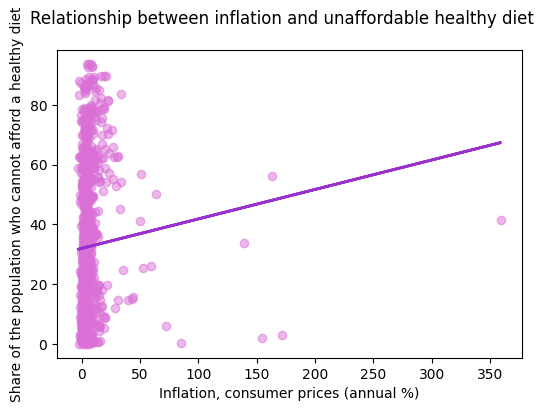

In [90]:
import matplotlib.pyplot as plt

# For standard regression (no log transformation)
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(data1, data2, alpha=0.5, color='orchid')
ax.plot(data1, data1 * slope + intercept, '-', color='darkorchid', linewidth=2)
ax.set_xlabel('Inflation, consumer prices (annual %)')
ax.set_ylabel('Share of the population who cannot afford a healthy diet')
fig.suptitle('Relationship between inflation and unaffordable healthy diet')
plt.show()

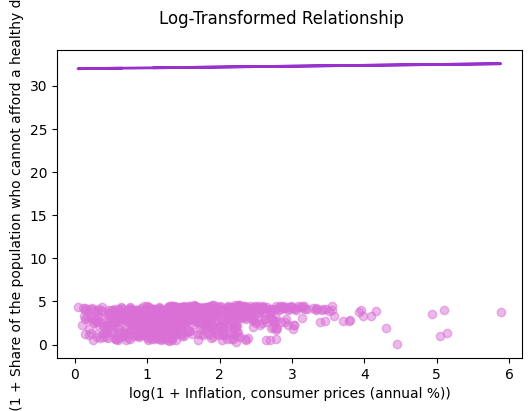

In [91]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(np.log1p(data1[mask]), np.log1p(data2[mask]), alpha=0.5, color='orchid')
ax.plot(np.log1p(data1[mask]), np.log1p(data1[mask]) * slope + intercept, '-', color='darkorchid', linewidth=2)
ax.set_xlabel('log(1 + Inflation, consumer prices (annual %))')
ax.set_ylabel('log(1 + Share of the population who cannot afford a healthy diet)')
fig.suptitle('Log-Transformed Relationship')
plt.show()

In [ ]:
''